# Other prediction algorithms in scikit-learn

## Decision trees

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target,random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9020979020979021


In [2]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9859154929577465
0.9090909090909091


In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
  feature_names=cancer.feature_names,impurity=False,filled=True)

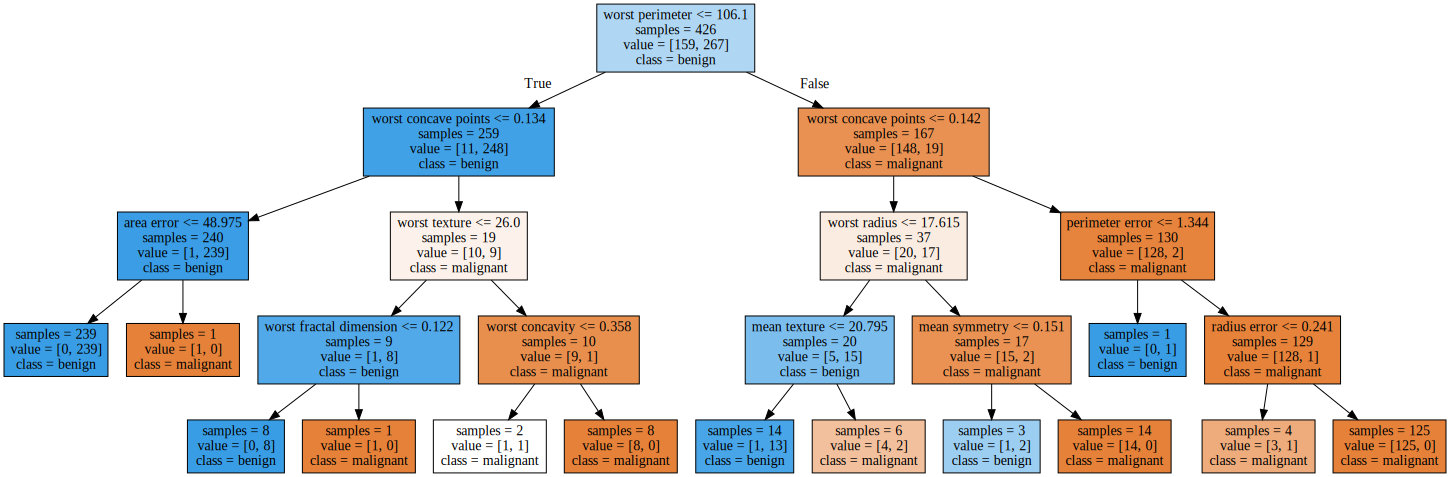

In [4]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

## Bagging and boosting

First let's try Random Forest.

In [5]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


Next boosting.

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

1.0
0.958041958041958


Adjusting the depth:

In [7]:
gb = GradientBoostingClassifier(random_state=0, max_depth=1)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))


0.9906103286384976
0.972027972027972


Next adjusting the learning rate:

In [8]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.9882629107981221
0.965034965034965


### Uncertainty estimates from classifiers

In [9]:
print(gb.decision_function(X_test))

[-1.14446016  1.68027315  1.7743656   1.7531149   1.7743656   1.7743656
  1.68027315  1.7743656   1.68027315  1.7743656  -0.62744776  1.65902244
  1.68027315 -0.98767685 -0.54751482 -1.08207046  1.02759281 -1.1784894
 -1.1784894  -1.1784894  -1.1784894  -1.1784894   1.77027491  1.7743656
 -1.1784894   1.7743656   1.7743656  -1.00427088  1.7743656  -1.1784894
  1.7743656  -1.1784894   1.73444178 -1.17973098  1.7743656  -1.14446016
  1.7743656  -1.17973098  1.7743656  -1.1784894  -0.49987714  1.7743656
 -0.8118344   1.7743656   0.18217956 -1.1784894   1.7743656   1.7743656
  1.7743656  -1.1784894  -0.61323384 -1.03163714 -1.17973098  1.7743656
  1.7743656   1.7743656   1.68027315  1.68027315  1.7743656  -1.1784894
 -1.14446016 -1.1784894   1.7743656   1.7743656  -0.64376202  1.34139846
 -1.1784894  -1.1784894  -1.1784894   1.7743656   1.68865068 -1.1784894
  1.7743656   0.15083135 -1.1784894   1.68027315  1.7743656   0.46598179
  1.7743656   1.7743656  -1.17973098 -1.1784894  -1.1784894 

In [10]:
print(gb.predict_proba(X_test))

[[0.75849759 0.24150241]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]
 [0.14765475 0.85234525]
 [0.14500026 0.85499974]
 [0.14500026 0.85499974]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]
 [0.1570593  0.8429407 ]
 [0.14500026 0.85499974]
 [0.65191052 0.34808948]
 [0.15989327 0.84010673]
 [0.1570593  0.8429407 ]
 [0.72862881 0.27137119]
 [0.63355882 0.36644118]
 [0.7468856  0.2531144 ]
 [0.26355105 0.73644895]
 [0.76467609 0.23532391]
 [0.76467609 0.23532391]
 [0.76467609 0.23532391]
 [0.76467609 0.23532391]
 [0.76467609 0.23532391]
 [0.14550814 0.85449186]
 [0.14500026 0.85499974]
 [0.76467609 0.23532391]
 [0.14500026 0.85499974]
 [0.14500026 0.85499974]
 [0.73189746 0.26810254]
 [0.14500026 0.85499974]
 [0.76467609 0.23532391]
 [0.14500026 0.85499974]
 [0.76467609 0.23532391]
 [0.15002031 0.84997969]
 [0.76489943 0.23510057]
 [0.14500026 0.85499974]
 [0.75849759 0.24150241]
 [0.14500026 0.85499974]
 [0.76489943 0.23510057]
 [0.14500026 0.85499974]
 [0.76467609 0.23532391]


## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
y = np.array([1, 1, 1, 2, 2, 2])
nb = GaussianNB()
nb.fit(X,y)
print(nb.predict([[-2,-2],[1,2]]))

[1 2]


Exercise 1. Try to understand what is happening in In[11]. Why is the label of $[-2,-2]$ predicted to be 1, and why is the label of $[1,2]$ predicted to be 2?

For class 1 both features tend to be negative.  For class 2 both features tend to be positive.  Therefore, there is a consensus: both features tend to suggest that the class for $[-2,-2]$ is 1 and the class of $[1,2]$ is 2.

## Logistic regression

Text(0,0.5,'Feature 1')

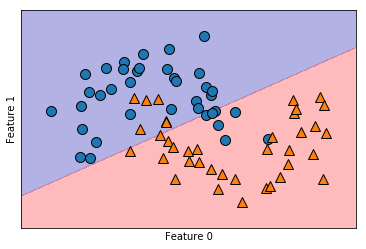

In [12]:
from sklearn import linear_model
from sklearn.datasets import make_moons
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
X,y = make_moons(n_samples=100,noise=0.25,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=0)
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(logistic,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Exercises: LDA and QDA

### Exercise 2

Text(0,0.5,'Feature 1')

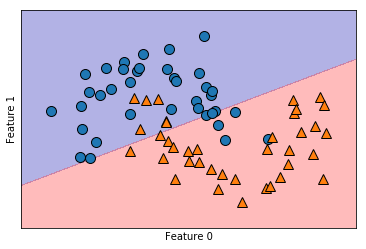

In [13]:
from sklearn import discriminant_analysis
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(lda,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

I can see the difference, but it's tiny.

### Exercise 3

Text(0,0.5,'Feature 1')

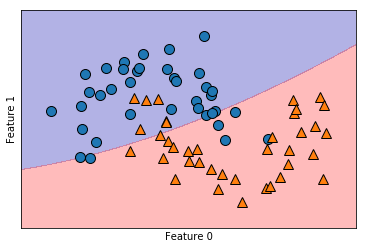

In [14]:
from sklearn import discriminant_analysis
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(qda,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")